In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#### read file and delete extra column at the beginning (name is already definedas a column variable)####

In [18]:
data = pd.read_csv("webscrape.csv")
del data["Unnamed: 0"]

In [7]:
#### split prices in two columns (discount price and previous price)

In [20]:
new = data['Price'].str.split(" ", n = 1, expand = True)
data['Previous_price'] = new[0]
data['Discount_price'] = new[1]
data.drop(columns = ['Price'], inplace = True)

In [ ]:
#### transform prices into float for further analysis, create diff variable to look at the difference between previous and discounted prices #####

In [21]:
data['Previous_price'] = data['Previous_price'].str.replace(',', '')
data['Previous_price'] = data['Previous_price'].str.replace('$', '')
data['Previous_price'] = data['Previous_price'].astype(float)

In [22]:
data['Discount_price'] = data['Discount_price'].str.replace(',', '')
data['Discount_price'] = data['Discount_price'].str.replace('$', '')
data['Discount_price'] = data['Discount_price'].astype(float)

In [23]:
data["Price_diff"] = data['Previous_price'] - data['Discount_price']

In [ ]:
#### Create another varible, discount percentage in order to quantify how much was discounted in terms of the price of the bottle

In [24]:
data["Discount"] = data['Price_diff']/data['Previous_price']

In [ ]:
### We also want the proof variable to be as float, nevertheless, there are somo string outliers with tags "Varies" and "72 proof"

In [25]:
data[data.Proof == 'Varies']

,Availability,Brand,Class,Name,Proof,Region,SKU,Type,Weight,Previous_price,Discount_price,Price_diff,Discount
164,In stock,Smooth Ambler,NaN,Smooth Ambler Old Scout Single Barrel Select B...,Varies,America,854570002366,Whiskey,3.5 lbs,74.95,74.95,0.0,0.0
613,Only 1 left in stock,Michter's,NaN,Michter’s Barrel Strength Rye Whiskey 2019,Varies,America,039383006518,NaN,3.5 lbs,169.95,169.95,0.0,0.0


In [28]:
data['Proof'] = data.Proof[data.Proof != '72 proof']

In [30]:
data['Proof'] = data.Proof[data.Proof != 'Varies']

In [ ]:
### Convert the Proof variable to numeric

In [32]:
data['Proof']=data['Proof'].astype(float)

In [ ]:
### Delete irrelevant variables, SKU (although useful for ID, has a lot of NA values) and Class (only useful for Whisky)

In [34]:
del data['SKU']

In [35]:
del data['Class']

In [ ]:
### drop NA values (observations lacking infromation such as Brand, Proof, Type and Region)

In [36]:
clean_data = data.dropna(axis=0, how='any')

In [ ]:
#### Statistic description of numeric variables #######

In [37]:
clean_data.describe()

,Proof,Previous_price,Discount_price,Price_diff,Discount
count,716.000000,716.000000,716.000000,716.000000,716.000000
mean,87.165810,109.906131,109.004888,0.901243,0.008723
std,16.589224,157.299915,155.472008,7.287217,0.049472
min,30.000000,2.950000,2.950000,0.000000,0.000000
25%,80.000000,36.980000,36.950000,0.000000,0.000000
50%,86.000000,59.950000,59.950000,0.000000,0.000000
75%,95.050000,119.950000,119.950000,0.000000,0.000000
max,151.000000,1499.950000,1399.950000,119.950000,0.620621


In [ ]:
### There is a product that got a 62% discount ####

In [49]:
clean_data[clean_data.Discount == max(clean_data.Discount)]  #### YAcht Club Vodka is a bang for your buck. ####

,Availability,Brand,Name,Proof,Region,Type,Weight,Previous_price,Discount_price,Price_diff,Discount
869,In stock,Yacht Club,Yacht Club Vodka 750ml,80.0,France,Vodka,3.5 lbs,49.95,18.95,31.0,0.620621


In [ ]:
#### Box plot of fonal prices (discounted), it seems there are several outliers (rare spirits)

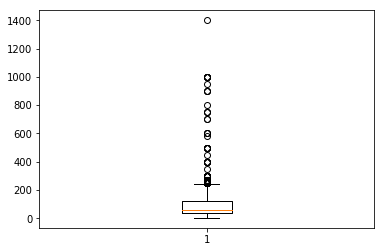

In [39]:
plt.boxplot(clean_data['Discount_price'])
plt.show()

In [ ]:
#### Once we filter out the outliers ######

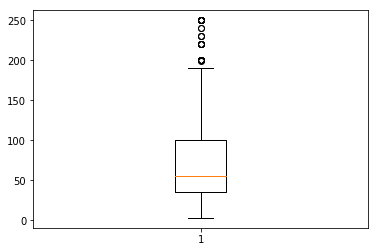

In [40]:
price = clean_data['Discount_price']
wo_out = price[price < 250]

plt.boxplot(wo_out)
plt.xlabel = ('Price')
plt.show()

In [ ]:
##### Number of bottles grouped by type of alcohol. Uptownspitis client base prefers Whisky, Tequila and Scotch

In [41]:
clean_data[['Name','Type']].groupby('Type').count()

,Name
Type,
Absinthe,1
Bitters,7
Bourbon,3
Brandy,10
Cognac,15
"Cognac, Liqueur",1
Gin,20
"Gin, Liqueur",3
Liqueur,27


In [ ]:
#### Group bottles according to availability, there are several bottles out-of-stock.

In [42]:
clean_data[['Name', 'Availability']].groupby('Availability').count()

,Name
Availability,
In stock,504
Only 1 left in stock,37
Only 2 left in stock,36
Only 3 left in stock,47
Out of stock,92


In [ ]:
### group data to every region's type of liquor ####

In [50]:
groupby_type_region = clean_data.groupby(['Type', 'Region'])

In [56]:
groupby_type_region['Availability'].count()  

Type             Region         
Absinthe         America              1
Bitters          Australia            7
Bourbon          Illinois             1
                 Indiana              1
                 Taiwan               1
Brandy           America              4
                 Bolivia              1
                 Italy                1
                 Spain                3
                 United States        1
Cognac           France              15
Cognac, Liqueur  France               1
Gin              America             10
                 Canada               1
                 England              1
                 Germany              2
                 Japan                1
                 London               2
                 Scotland             1
                 Spain                2
Gin, Liqueur     Scotland             3
Liqueur          America             10
                 England              1
                 France               5
       

In [ ]:
 #### The three main regions that produce alcoholic liquors are US, MExico and Scotland, this makes sense with its main products, Tequila, Whisky and Scotch

In [51]:
clean_data[["Type", "Region","Name"]].groupby(["Type", "Region"]).count()

Name
Type            Region               
Absinthe        America             1
Bitters         Australia           7
Bourbon         Illinois            1
                Indiana             1
                Taiwan              1
Brandy          America             4
                Bolivia             1
                Italy               1
                Spain               3
                United States       1
Cognac          France             17
Cognac, Liqueur France              1
Gin             America            10
                Canada              1
                England             1
                Germany             2
                Japan               1
                London              2
                Scotland            1
                Spain               2
Gin, Liqueur    Scotland            3
Liqueur         America            10
                England             1
                France              5
                Ireland             1
                Italy               3
                Mexico              1
                Scotland            1
                Switzerland         5
Mezcal          America             2
...                               ...
Rum             United States       5
                Venezuela           3
Rye             America             2
Scotch          America             5
                Scotland          121
                Speyside            1
Tequila         America             1
                Mexico            100
Vermouth        Italy               2
Vodka           America             7
                Finland             1
                France              3
                Japan               1
                Russia              1
                Slovak Republic     1
                Sweden              3
Whiskey         America           144
                Australia           1
                Canada              2
                England             1
                Illinois            2
                India               1
                Ireland            37
                Japan              27
                Kentucky            1
                Mexico              2
                New Zealand         2
                Scotland           27
                Taiwan              6
                United States       3

[86 rows x 1 columns]

In [ ]:
#Histogram (Distribution) of proof, seems that most liquors converge to an 80 proof (Regulations?)
#Nonehteless, there are several outliers in both tails

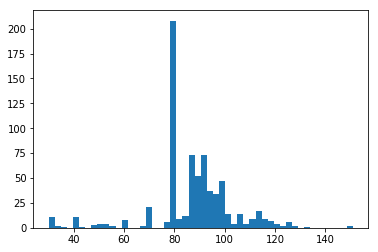

In [45]:
plt.hist(clean_data['Proof'], bins = 50)
plt.show()

In [ ]:
# Filter the liquors with the most proof level
# Guyana Rum (Lemon Hart) seems to be the bottle with the most proof level.

In [57]:
clean_data[clean_data.Proof >= 120]

,Availability,Brand,Name,Proof,Region,Type,Weight,Previous_price,Discount_price,Price_diff,Discount
59,Only 1 left in stock,Knob Creek,Knob Creek Single Barrel Bourbon Whiskey 750ml,120.0,America,Whiskey,3.5 lbs,51.95,51.95,0.0,0.0
65,Out of stock,"Buffalo Trace, Stagg",Stagg Jr Bourbon Whiskey 750ml,126.0,America,Whiskey,3.5 lbs,79.95,79.95,0.0,0.0
151,Out of stock,Garrison Brothers,Garrison Brothers Cowboy Bourbon Whiskey 750ml,133.9,America,Whiskey,3.5 lbs,239.95,239.95,0.0,0.0
165,Out of stock,Chichibu,Chichibu Ichiro’s Cask #646 Single Malt Whiskey,121.2,Japan,Whiskey,3.5 lbs,799.95,799.95,0.0,0.0
242,Only 3 left in stock,1792,1792 Full Proof Bourbon Whiskey 750ml,125.0,America,Whiskey,3.5 lbs,49.95,49.95,0.0,0.0
331,Out of stock,Octomore,Octomore Edition 07.3 Whiskey 750ml,126.0,Scotland,Scotch,3.5 lbs,179.95,179.95,0.0,0.0
392,In stock,Lemon Hart & Son,Lemon Hart 151 750ml,151.0,Guyana,Rum,3.5 lbs,39.99,39.99,0.0,0.0
400,Only 1 left in stock,Willett,Willett Family Estate 5 Year Single Barrel Bou...,127.8,America,Whiskey,3.5 lbs,599.95,599.95,0.0,0.0
437,In stock,Young & Yonder Spirits,Fellows & Foragers Absinthe 750ml,120.0,America,Absinthe,3.5 lbs,44.95,44.95,0.0,0.0
464,In stock,Cutwater Spirits,Cutwater Spirits Three Sheets Cask Strength Ru...,128.0,United States,Rum,3.5 lbs,99.95,99.95,0.0,0.0


In [ ]:
# Look for the least alcoholic liquors
# Austin Cocktails are the ones with the lowest proof levels

In [99]:
clean_data[clean_data.Proof == 30]

,Availability,Brand,Name,Price,Proof,Region,Type,Weight
217,In stock,Blue Chair Bay,Blue Chair Bay Rum Banana Cream Rum,16.95,30.0,Caribbean,Rum,3.5 lbs
319,In stock,Brinley Gold Shipwreck,Brinley Gold Shipwreck Coconut Cream 750ml,27.95,30.0,Saint Kitts,Rum,3.5 lbs
605,In stock,Austin Cocktails,Austin Cocktails Cucumber Vodka Mojito,18.95,30.0,America,Vodka,3.5 lbs
606,In stock,Austin Cocktails,Austin Cocktails Perfect Bergamot Orange Marga...,18.95,30.0,America,Tequila,3.5 lbs
607,In stock,Austin Cocktails,Austin Cocktails Ruby Red Cocktail,18.95,30.0,America,Vodka,3.5 lbs
608,In stock,Austin Cocktails,Austin Cocktails Peppered Maple Blood Orange B...,18.95,30.0,America,Whiskey,3.5 lbs
609,In stock,Austin Cocktails,Austin Cocktails New School Gin Mule,18.95,30.0,America,Gin,3.5 lbs
741,In stock,Blue Chair Bay,Blue Chair Bay Key Lime Cream Rum,16.95,30.0,Caribbean,Rum,3.5 lbs


In [ ]:
### Now, let's look at the most expensive bottles per region

In [100]:
clean_data.groupby('Region')['Price'].max()

Region
America               1499.95
Amsterdam               29.95
Australia               52.95
Bahamas                264.95
Barabados               69.95
Barbados                89.95
Belize                  37.95
Bolivia                 39.95
Canada                  49.95
Caribbean              119.95
Costa Rica              49.95
Dominican Republic    1499.95
El Salvador             29.95
England                 57.95
Finland                 36.95
France                4999.95
Germany                 81.95
Guatemala               49.95
Guyana                  69.95
Haiti                   45.95
Hawaii                  39.99
Illinois                59.95
India                   67.95
Indiana                 69.95
Ireland                499.95
Italy                   49.95
Jamaica                579.95
Japan                  999.95
Kentucky                45.95
London                  54.95
Martinique              45.95
Mexico                1799.95
New Zealand             99.99
Nic

In [ ]:
### The most expensive bottles can be found in America/US, Scotland and Mexico, nonethelss, special cases arise like Dom. Rep and France

In [ ]:
# Filter the most expensive bottle in Scotland

In [110]:
clean_data[clean_data.Price == 5999.95]



,Availability,Brand,Name,Price,Proof,Region,Type,Weight
612,Only 1 left in stock,GlenGoyne,Glengoyne 35 Year Single Malt Scotch Whiskey,5999.95,93.6,Scotland,Scotch,5 lbs


In [ ]:
# Filter the most expensive bottle in France, it's a Cognac

In [109]:
clean_data[clean_data.Price == 4999.95]

,Availability,Brand,Name,Price,Proof,Region,Type,Weight
611,Only 1 left in stock,Martell,Martell L’or De Jean Cognac,4999.95,80.0,France,Cognac,5 lbs


In [ ]:
# Filter the most expensive bottle in Mexico, Clase Azul

In [ ]:
# Recall that this bottles are unique, uptownspirits only sell ONE

In [108]:
clean_data[clean_data.Price == 1799.95]

,Availability,Brand,Name,Price,Proof,Region,Type,Weight
320,Only 1 left in stock,Clase Azul,Tequila Clase Azul Ultra 750ml,1799.95,80.0,Mexico,Tequila,3.5 lbs


In [ ]:
#### Grouping by limite availability (only one item left)

In [58]:
only_one = clean_data[clean_data.Availability == "Only 1 left in stock"]

In [59]:
only_one.describe()

,Proof,Previous_price,Discount_price,Price_diff,Discount
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,96.100000,386.726757,383.685135,3.041622,0.007225
std,11.043802,350.841340,342.642080,16.511736,0.034473
min,80.000000,51.950000,49.950000,0.000000,0.000000
25%,92.000000,109.990000,109.990000,0.000000,0.000000
50%,92.000000,249.950000,249.950000,0.000000,0.000000
75%,100.000000,579.950000,579.950000,0.000000,0.000000
max,127.800000,1499.950000,1399.950000,100.000000,0.200672


In [61]:
### Not available bottles can be expensive, also they have no discount at all. 

In [62]:
### Filter whisky from the dataset and group it according to availability

In [63]:
whisky_left = clean_data[clean_data.Type == 'Whiskey']

In [64]:
whisky_left.groupby('Availability')['Name'].count()

Availability
In stock                154
Only 1 left in stock     12
Only 2 left in stock     13
Only 3 left in stock     15
Out of stock             60
Name: Name, dtype: int64

In [65]:
## Keep only the not available whisky ###

In [66]:
out_of_whisky = whisky_left[clean_data.Availability == 'Out of stock']
out_of_whisky

C:\Users\ferme\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Availability,Brand,Name,Proof,Region,Type,Weight,Previous_price,Discount_price,Price_diff,Discount
1,Out of stock,E.H. Taylor,E.H. Taylor Small Batch Bourbon Whiskey 750ml,100.00,America,Whiskey,3.5 lbs,49.95,43.95,6.00,0.12012
11,Out of stock,Woodford Reserve,Woodford Reserve 2019 20th Anniversary Kentuck...,90.40,America,Whiskey,3.5 lbs,54.95,54.95,0.00,0.00000
17,Out of stock,Willett,Willett Pot Still Reserve Small Batch Bourbon ...,94.00,America,Whiskey,3.5 lbs,49.95,49.95,0.00,0.00000
19,Out of stock,Weller,Weller Special Reserve Bourbon Whiskey 750ml,90.00,America,Whiskey,3.5 lbs,59.95,59.95,0.00,0.00000
21,Out of stock,Weller,Old Weller Antique 107 Bourbon Whiskey 750ml,107.00,America,Whiskey,3.5 lbs,109.95,109.95,0.00,0.00000
24,Out of stock,Angels Envy,Angels Envy Caribbean Rum Cask Finish Rye Whiskey,100.00,America,Whiskey,3.5 lbs,88.95,88.95,0.00,0.00000
28,Out of stock,Crown Royal,Crown Royal Peach Whiskey,70.00,Canada,Whiskey,3.5 lbs,49.95,49.95,0.00,0.00000
31,Out of stock,Rebel Yell,Rebel Yell 10 Year Single Barrel Bourbon Whiskey,100.00,America,Whiskey,3.5 lbs,69.95,69.95,0.00,0.00000
32,Out of stock,Hibiki,Hibiki Japanese Harmony Special Edition Whiskey,86.00,Japan,Whiskey,3.5 lbs,249.95,249.95,0.00,0.00000
35,Out of stock,High West,High West A Midwinter Nights Dram A6S6 750ml,98.60,America,Whiskey,3.5 lbs,129.95,129.95,0.00,0.00000


In [67]:
##### Group the whisky accordng to brand and look for the median price of them ####

In [69]:
out_of_whisky.groupby('Brand')['Discount_price'].median()

Brand
1792                      64.95
Abraham Bowman            99.95
Angels Envy               88.95
Bird Dog                  39.95
Blood Oath               109.95
Bookers                   89.95
Buffalo Trace, Stagg      79.95
Buffalo Trace, Weller    249.95
Chichibu                 799.95
Compass Box              899.95
Cream Off Kentucky       199.95
Crown Royal               49.95
Dalwhinnie               109.95
E.H. Taylor               94.95
Four Roses               299.95
Garrison Brothers        239.95
Hibiki                   249.95
High West                129.95
Jack Daniels             129.95
Jameson                  339.95
Jim Beam                 199.95
Joseph Magnus            269.95
Kavalan                  259.95
Midleton                 259.95
Mitchers                 199.95
Nikka                    399.95
Old Ezra                  59.95
Old FItzgerald           299.95
Old Forester             260.95
Orphan Barrel            199.95
Paddy                     17.95
Pa

In [70]:
### Cheapest, not available whisky

In [74]:
out_of_whisky[out_of_whisky.Discount_price == out_of_whisky.Discount_price.min()]

,Availability,Brand,Name,Proof,Region,Type,Weight,Previous_price,Discount_price,Price_diff,Discount
439,Out of stock,Paddy,Paddy Bee Sting Irish Honey Whiskey 750ml,70.0,Ireland,Whiskey,3.5 lbs,17.95,17.95,0.0,0.0


In [ ]:
#### Is it a bang for your buck? Is it out of stock because of high demand or rather there is no recent supply for the product-

In [ ]:
#### reviews might prove useful in this case, further parsing ####